In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

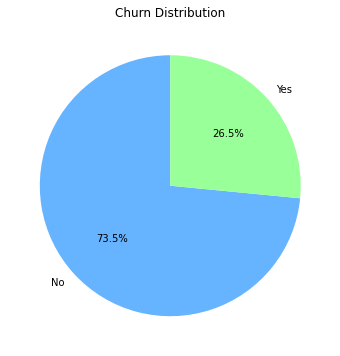

In [6]:
churn_distribution = df['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Churn Distribution')
plt.show()

예측 타겟 컬럼인 Churn 컬럼의 비율을 시각화한 것이다.

잔존 고객의 비율이 73.5%, 이탈 고객의 비율이 26.5%로 데이터 불균형이 존재한다.

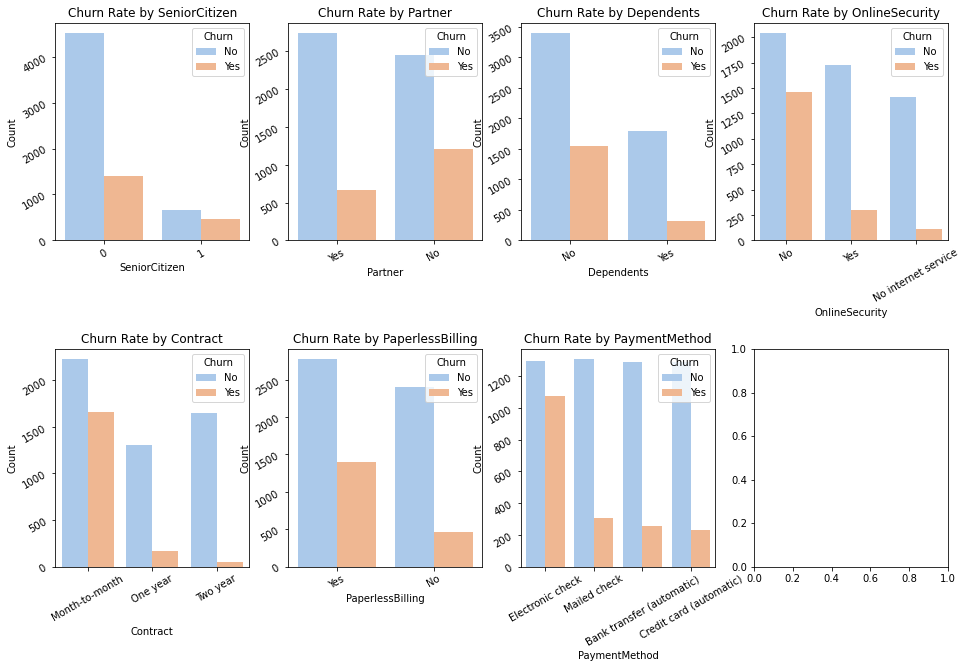

In [12]:
categoric_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'Contract', 
                  'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)

# 범주형 컬럼에 대한 Churn 비율 비교 함수
def plot_churn_by_category_subplot(column_name, ax):
    sns.countplot(x=column_name, hue='Churn', data=df, ax=ax, palette='pastel')
    ax.set_title(f'Churn Rate by {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
    ax.tick_params(labelrotation=30)

# 범주형 컬럼에 대한 subplot 생성
for i, col in enumerate(categoric_cols):
    plot_churn_by_category_subplot(col, axes[i//4, i%4])

plt.show()

범주형 컬럼에 대해 Churn 비율을 시각화

SeniorCitizen: 데이터 불균형이 존재하긴 하지만 노인일 경우 이탈과 잔존 비율이 비슷한 것을 볼 수 있다.

Partner: 배우자가 없는 경우의 이탈 비율이 조금 더 높은 것을 확인할 수 있다.

Dependents: 부양가족이 없는 경우의 이탈 비율이 더 높은 것을 볼 수 있다.

(파트너, 부양가족 관계도 확인하기)

OnlineSecurity: OnlineSecurity 서비스를 가입하지 않은 고객의 이탈 비율이 높다.

Contract: 장기계약(1년 또는 2년)을 하는 고객보다 월 단위 계약을 하는 고객들의 이탈 비율이 월등히 높은 것을 확인할 수 있다.

PaperlessBilling: 종이 청구서를 받는 고객들이 이탈 비율이 높다.

(종이청구서랑 senior 관계도 확인하기)

PaymentMethod: 전자수표로 결제하는 고객들이 메일 수표, 은행송금, 신용카드 자동 결제하는 고객들보다 이탈 비율이 높다.



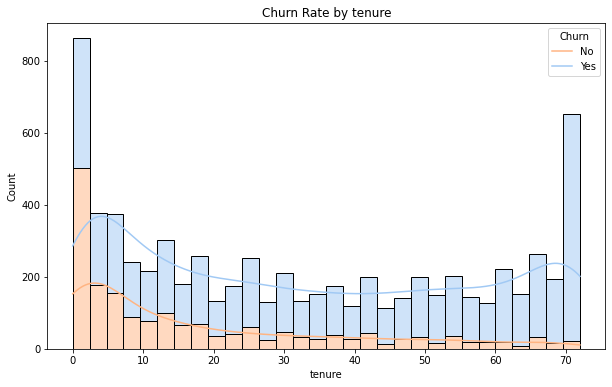

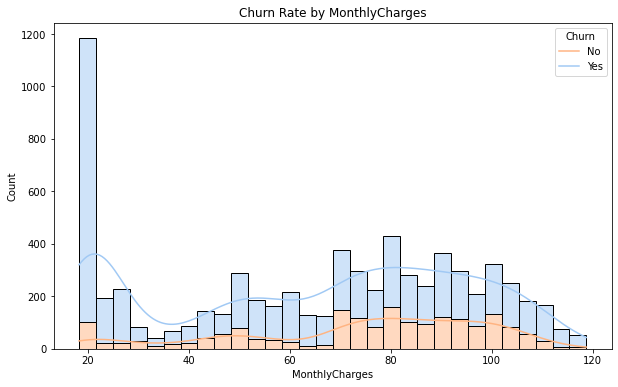

In [18]:
numeric_cols = ['tenure', 'MonthlyCharges']

# histogram으로 Churn Yes와 No 비교 함수
def plot_churn_by_numeric_histogram(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, hue='Churn', multiple='stack', bins=30, palette='pastel', kde=True)
    plt.title(f'Churn Rate by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

# 수치형 컬럼에 대한 histogram 생성
for col in numeric_cols:
    plot_churn_by_numeric_histogram(col)

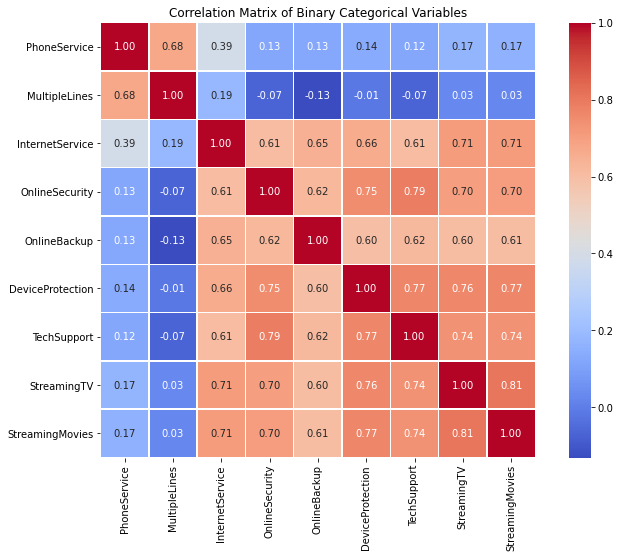

In [19]:
binary_categorical_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# 이진 범주형 변수들 간의 상관관계 히트맵 생성
correlation_matrix = df[binary_categorical_cols].apply(lambda x : pd.factorize(x)[0]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', square=True)
plt.title('Correlation Matrix of Binary Categorical Variables')
plt.show()

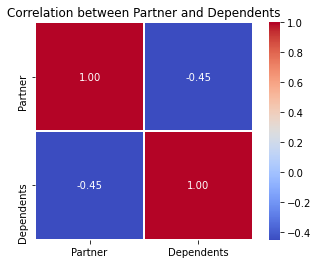

In [20]:
correlation_matrix = df[['Partner', 'Dependents']].apply(lambda x : pd.factorize(x)[0]).corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', square=True)
plt.title('Correlation between Partner and Dependents')
plt.show()

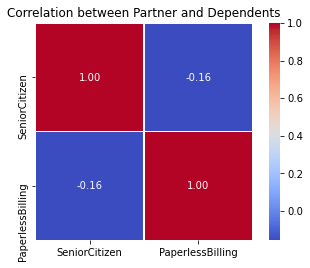

In [21]:
correlation_matrix = df[['SeniorCitizen', 'PaperlessBilling']].apply(lambda x : pd.factorize(x)[0]).corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', square=True)
plt.title('Correlation between Partner and Dependents')
plt.show()